In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
df = pd.read_csv('neurodegenerative_progression.csv')

In [3]:
df.head()

Age  Gender  Years_Since_Diagnosis  Lesion_Volume  Hippocampal_Volume  \
0   56  Female                     11          12.23                2.14   
1   89  Female                      3          30.74                3.96   
2   67    Male                     13          11.73                2.70   
3   89  Female                      5          35.92                2.92   
4   61    Male                     13          19.17                2.55   

   White_Matter_Changes  Cognitive_Score  Memory_Score Disease_Stage  \
0                  6.62               20             4         Early   
1                  9.44                5             9      Advanced   
2                  1.84                8             5      Moderate   
3                  5.17               14             7      Advanced   
4                  0.44               22             5      Moderate   

   Progression_Status  
0                   0  
1                   1  
2                   1  
3                   1  
4                   1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 10000 non-null  object 
 2   Years_Since_Diagnosis  10000 non-null  int64  
 3   Lesion_Volume          10000 non-null  float64
 4   Hippocampal_Volume     10000 non-null  float64
 5   White_Matter_Changes   10000 non-null  float64
 6   Cognitive_Score        10000 non-null  int64  
 7   Memory_Score           10000 non-null  int64  
 8   Disease_Stage          10000 non-null  object 
 9   Progression_Status     10000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

Age  Years_Since_Diagnosis  Lesion_Volume  Hippocampal_Volume  \
count  10000.000000           10000.000000   10000.000000        10000.000000   
mean      69.517700               7.045500      24.905062            3.240298   
std       11.509619               4.326858      14.385391            0.719218   
min       50.000000               0.000000       0.010000            2.000000   
25%       60.000000               3.000000      12.360000            2.627500   
50%       69.000000               7.000000      25.055000            3.230000   
75%       80.000000              11.000000      37.200000            3.860000   
max       89.000000              14.000000      50.000000            4.500000   

       White_Matter_Changes  Cognitive_Score  Memory_Score  Progression_Status  
count          10000.000000     10000.000000  10000.000000        10000.000000  
mean               4.978185        14.469200      4.504400            0.500500  
std                2.892682         8.655434      2.868415            0.500025  
min                0.000000         0.000000      0.000000            0.000000  
25%                2.460000         7.000000      2.000000            0.000000  
50%                4.970000        14.000000      4.000000            1.000000  
75%                7.470000        22.000000      7.000000            1.000000  
max               10.000000        29.000000      9.000000            1.000000

In [6]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Disease_Stage'] = df['Disease_Stage'].map({'Early': 0, 'Moderate': 1, 'Advanced': 2})

In [7]:
X = df.drop('Progression_Status', axis=1)
y = df['Progression_Status']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 10000 non-null  int64  
 2   Years_Since_Diagnosis  10000 non-null  int64  
 3   Lesion_Volume          10000 non-null  float64
 4   Hippocampal_Volume     10000 non-null  float64
 5   White_Matter_Changes   10000 non-null  float64
 6   Cognitive_Score        10000 non-null  int64  
 7   Memory_Score           10000 non-null  int64  
 8   Disease_Stage          10000 non-null  int64  
 9   Progression_Status     10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


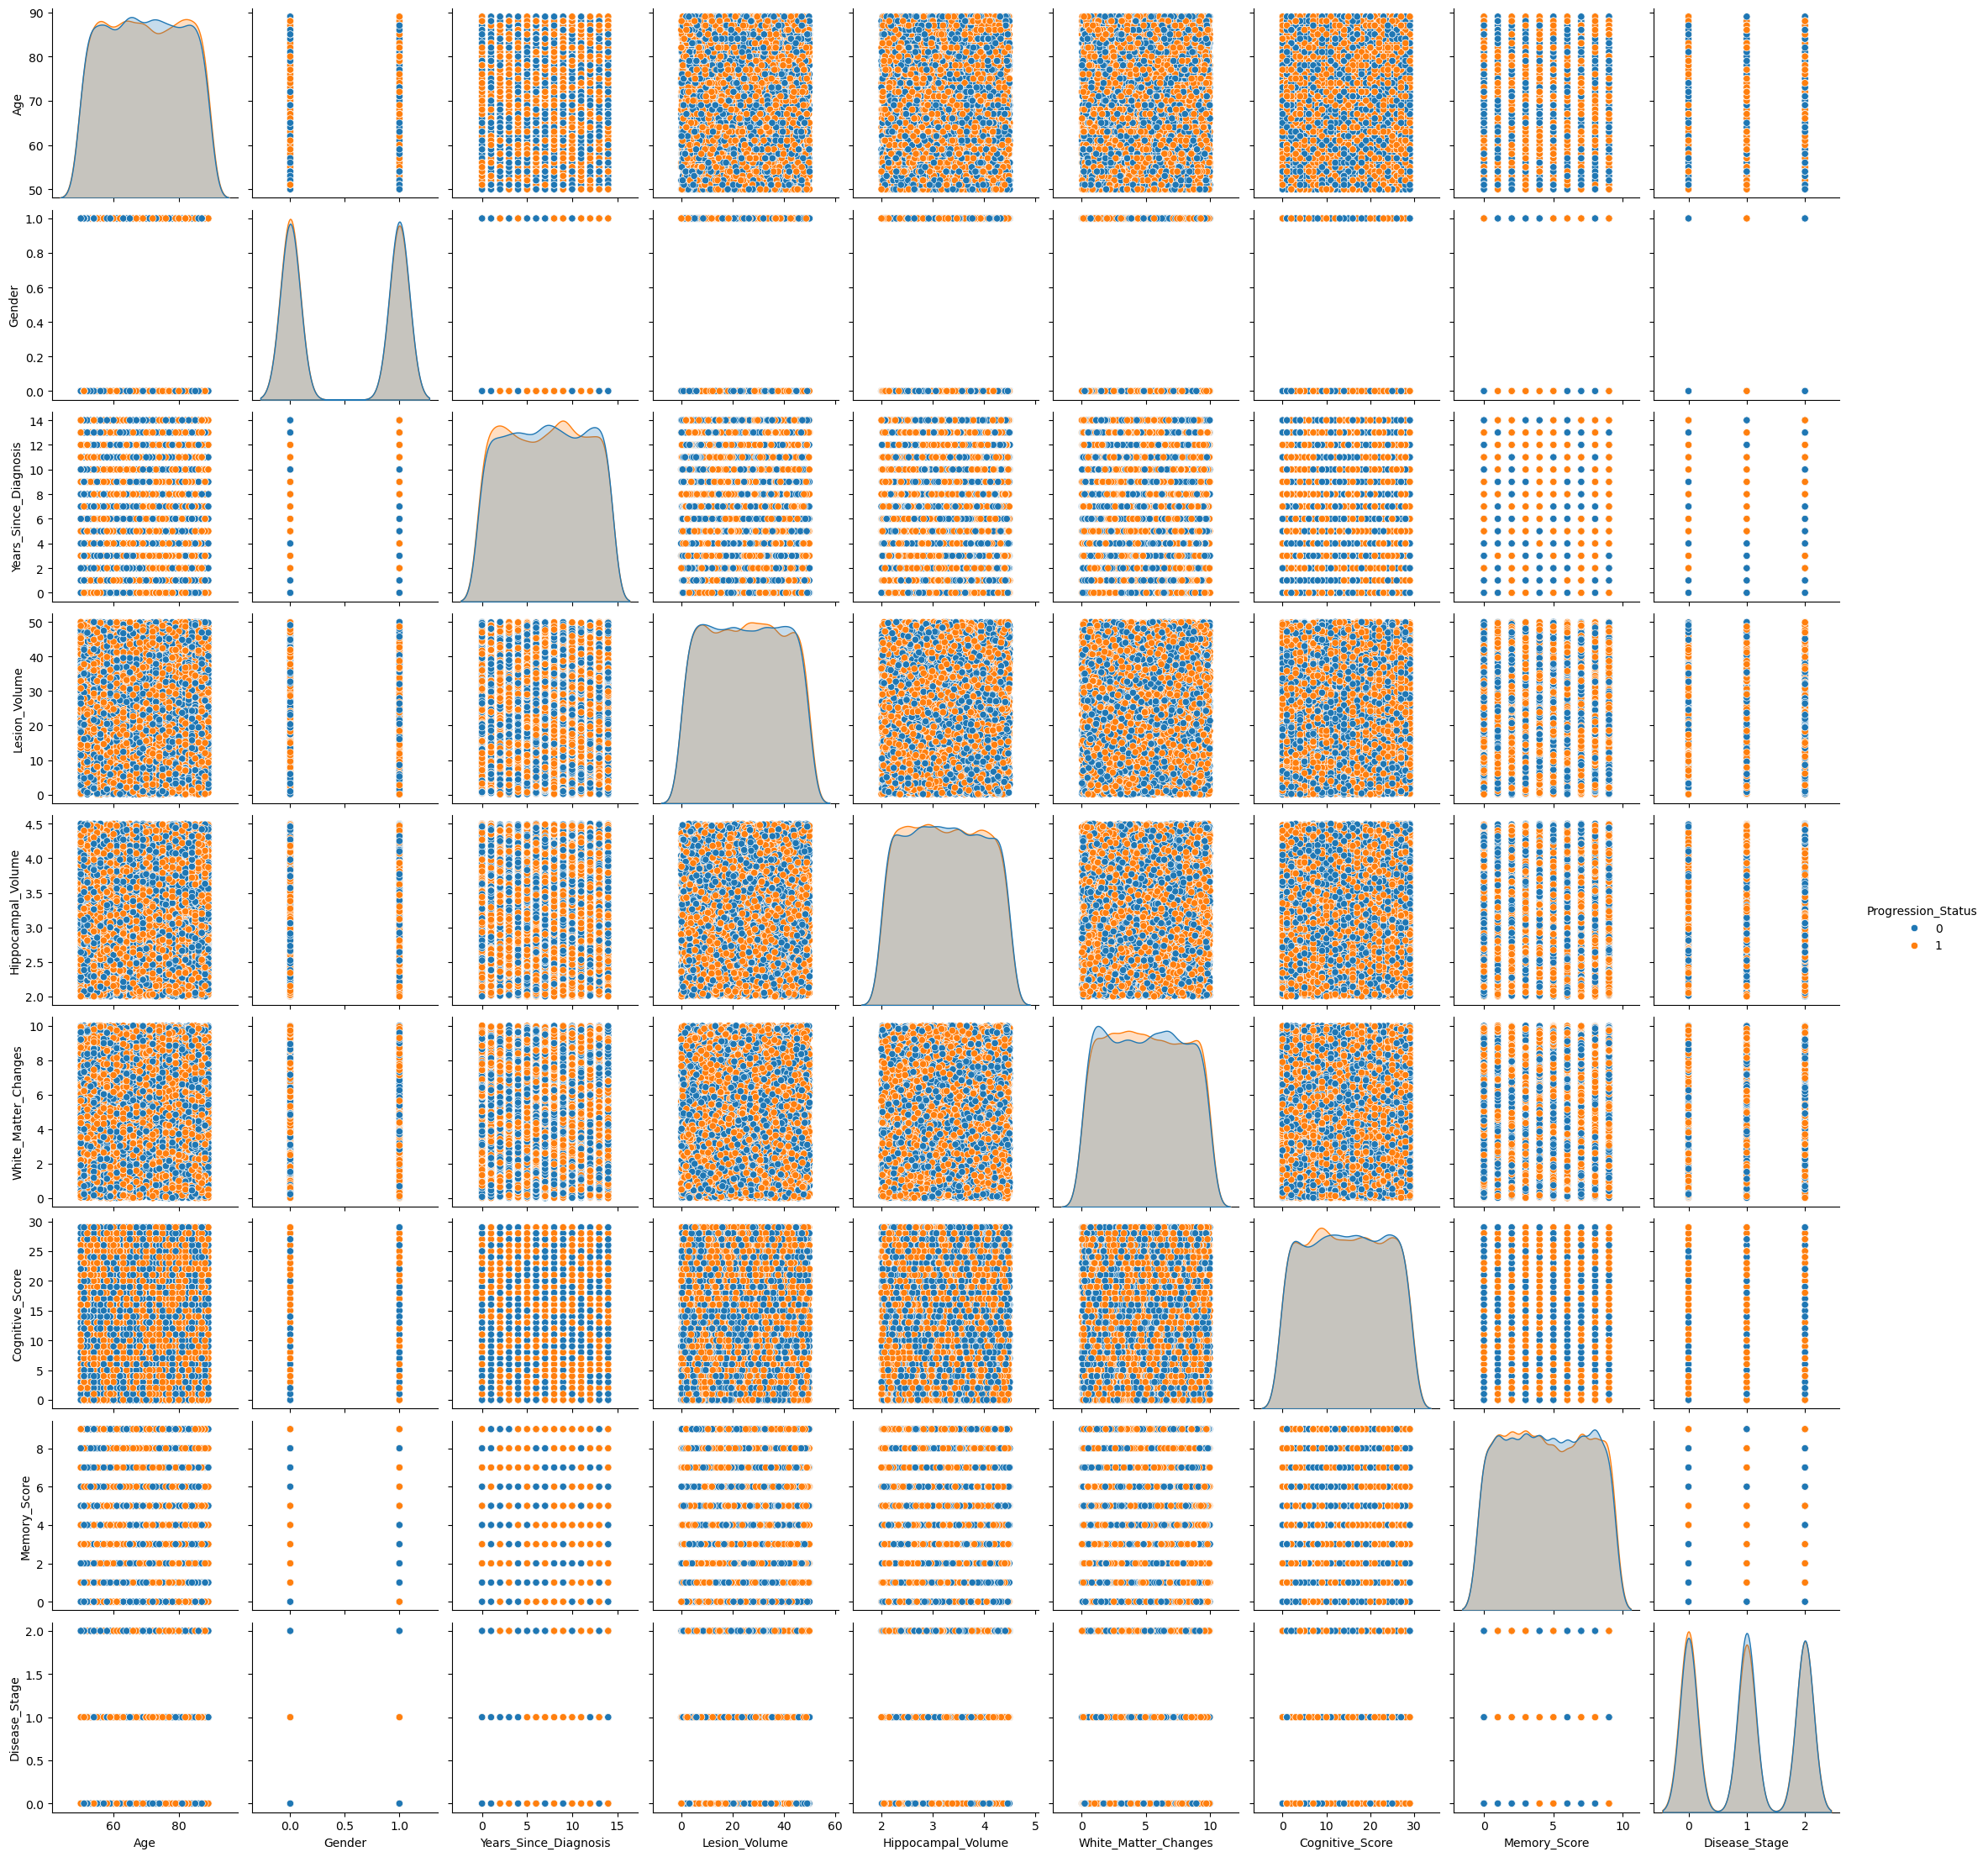

In [11]:
sns.pairplot(df, hue='Progression_Status')
plt.show()

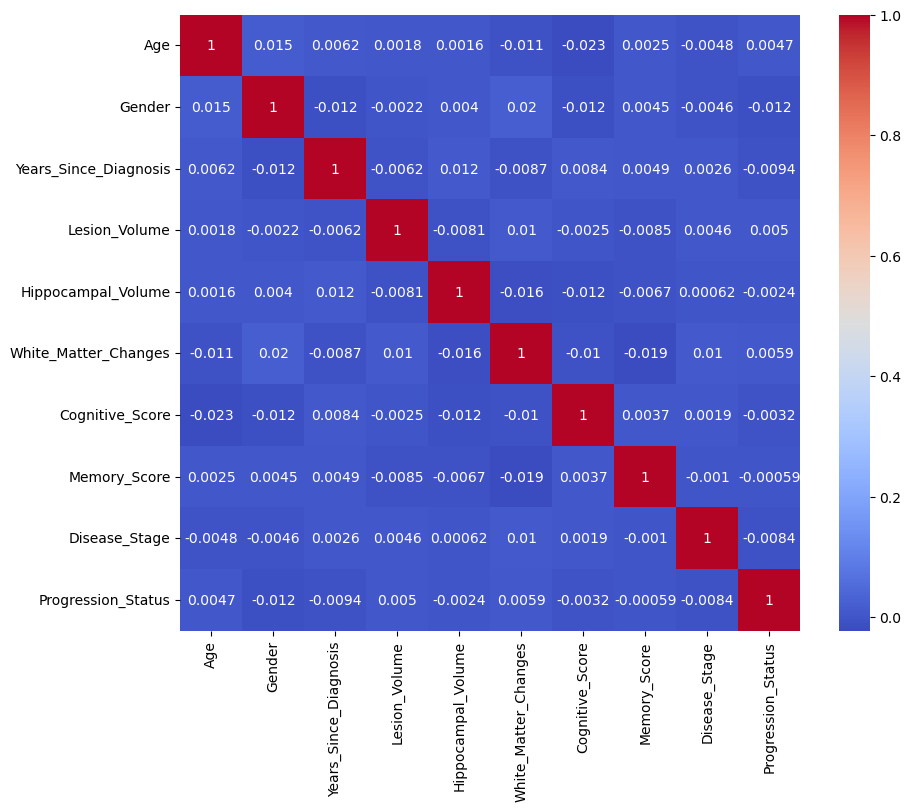

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

In [14]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

RandomForest Accuracy: 0.49
LogisticRegression Accuracy: 0.50
SVM Accuracy: 0.49
KNN Accuracy: 0.48
DecisionTree Accuracy: 0.49


In [15]:
best_model_name = max(model_results, key=model_results.get)
best_accuracy = model_results[best_model_name]
print(f"Best Model: {best_model_name} with accuracy {best_accuracy:.2f}")

Best Model: LogisticRegression with accuracy 0.50


In [16]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

In [17]:
print(f"Classification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred_best))

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.49      0.67      0.57       964
           1       0.53      0.35      0.42      1036

    accuracy                           0.50      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.51      0.50      0.49      2000



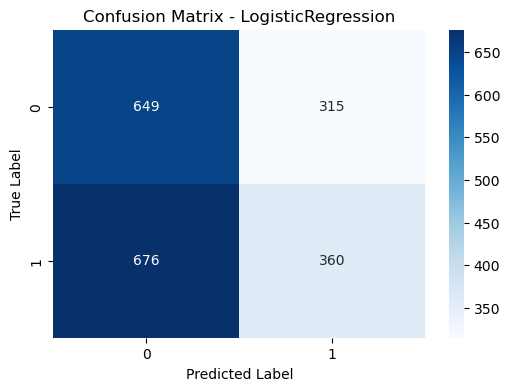

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [19]:
with open(f"{best_model_name}_model.pkl", 'wb') as file:
    pickle.dump(best_model, file)